# PURPOSE OF THIS JUPYTER NOTEBOOK

TO DEVELOP A RANGE OF DATA ANALYTICS SPECIFIC PREDICTIVE MODELS TO HELP AUTOMATE THE SOURCING AND UNCOVERING OF EXCEPTIONAL FINTECH STARTUPS IN VC INVESTING


# BRIEF BACKGROUND TO THE CHOSEN DATASET

Data is collected from two sources: Viziologi and Crunchbase. 
 

*   From Viziologi, a dataset of 1485 instances and 19 variables is obtained. The dataset spans both active and inactive, private companies who have raised Pre-Seed, Seed, Series A, Series B and Series C rounds of funding, as well as public companies. The dataset contains 19 variables: company name, sector, industry, business model patterns, company description, company url, headquarters, area, country,
founding year, company type, tags, social impact, life impact, emotional impact, functional impact, digital maturity, similar business patterns and similar companies.

*   The Viziologi dataset is supplemented with additional data from Crunchbase. Crunchbase Pro lookup reveals that 118 companies in the Viziologi dataset do not have a Crunchbase presence.
Furthermore, due to invalid URLs and bot protection software, only 74% of the companies identified in the Viziologi dataset can be supplemented with information from Crunchbase.
Hence, a dataset of 1008 instances and 11 variables is scraped from Crunchbase: name, operating_status, ipo, company type, latest funding type, latest_funding_date, second latest funding type, second latest funding date, patents, trademarks, hub.

# MERGING THE VIZIOLOGI AND CRUNCHBASE DATASETS

The Viziologi and Crunchbase datasets are first cleaned and preprocessed, before merging them into one dataset (df_merged). Companies that are represented in both the Viziologi and Crunchbase datasets are included in the merged dataset. Companies that fail to fulfil the recency requirement – founded before 2007 – are dropped. In total, the merged dataset comprises of 526 recent start-ups.

We shall use the merged dataset (df_merged) to perform data cleaning and preparation, feature engineering, exploratory data analysis (EDA), machine learning modelling and evaluation, in a bid to identify the exceptional fintech startups for VC investing. 

# THE CHOSEN MACHINE LEARNING PREDICTIVE MODELS

We shall build and evaluate the performance of at least five machine learning classification models, i.e.:

1. LOGISTICS REGRESSION CLASSIFER
2. SUPPORT VECTOR MACHINE CLASSIFIER
3. KTH NEAREST NEIGHBOUR (KNN) CLASSIFIER
4. DECISION TREE CLASSIFIER
5. RANDOM FOREST CLASSIFIER 

# IMPORTING THE NECESSARY LIBRARIES AND MODULES FOR THIS PROJECT

In [1]:
# import the following libraries and modules that are required for completing this project
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict 

# LOADING THE MERGED_DATASET (MERGED FROM THE VIZIOLOGI AND CRUNCHBASE DATASETS)

**1. LOAD THE MERGED DATASET INTO THE NOTEBOOK**

In [62]:
# load the df_merged dataset and view the first 3 rows
df_merged=pd.read_csv('/content/df_merged_2.csv')
df_merged.head(5)

,name,sector,category,country,operating_status,ipo,patents,trademarks,hub,latest_funding_type_column,second_latest_funding_type_column,latest_funding_year,second_latest_funding_year,founded,success_labels
0,Argo AI,Transportation,Automotive,US,Active,Private,46,7,Unicorn,Corporate Round,Funding Round,2019,2017,2017.0,1.0
1,DeepAI,Technology,Software,US,Seed,Private,0,0,Unicorn,Seed Round,Angel Round,2019,2018,2017.0,1.0
2,Juni Learning,Consumer Services,Education,US,Early Stage Venture,Private,0,0,Unicorn,Series A,Seed Round,2020,2019,2017.0,1.0
3,Modern Fertility,Healthcare,Health,US,Early Stage Venture,Private,0,0,Unicorn,Series A,Seed Round,2019,2018,2017.0,1.0
4,Pixsweet,Consumer Goods,Food & Beverages,US,IPO,Private,3,0,Unicorn,Angel Round,Angel Round,2016,2018,2017.0,1.0


2. CALCULATE THE NUMBER OF ROWS AND COLUMNS IN THE MERGED DATASET

In [63]:
# print work out the shape of the merged dataset
print('The merged dataset has',df_merged.shape[0],'rows and',df_merged.shape[1],'columns at the time of loading it into this notebook')

The merged dataset has 553 rows and 15 columns at the time of loading it into this notebook


# DATA CLEANING AND PREPROCESSING OF THE MERGED DATASET

**1. CHECK FOR PRESENCE OF MISSING VALUES** 



In [64]:
# checking for presence of missing values 
df_merged.isnull().sum()

name                                  34
sector                               167
category                             167
country                              167
operating_status                       0
ipo                                    0
patents                                0
trademarks                             0
hub                                    0
latest_funding_type_column             0
second_latest_funding_type_column      0
latest_funding_year                    0
second_latest_funding_year             0
founded                              167
success_labels                         0
dtype: int64

**Results:** 

From the results given below, we can see that the data contains some missing vaues in some of the columns 

**2. REMOVE THE MISSING VALUES BY IMPUTING THEM WITH THEIR MODES** 

We can remove these missing values, by imputing them with their mode values 

In [65]:
# first, drop the 'name' column, since it is just a descriptive variable and not predictive
merged1 = df_merged
#merged1.drop('name', axis = 1, inplace = True)

# impute the missing values with the mode values for each individual column
for i in merged1.iloc[:, [1,2,3,4,13]]:
  merged1[i] = merged1[i].fillna(merged1[i].mode()[0])

# check the dataset again to check whether there are still missing values  
print(merged1.iloc[:, 1:].isnull().sum())

sector                               0
category                             0
country                              0
operating_status                     0
ipo                                  0
patents                              0
trademarks                           0
hub                                  0
latest_funding_type_column           0
second_latest_funding_type_column    0
latest_funding_year                  0
second_latest_funding_year           0
founded                              0
success_labels                       0
dtype: int64


**Results:**

From the results above, the dataset now no longer contains any missing values

# FEATURE ENGINEERING OF VARIOUS COLUMNS IN THE MERGED DATASET

**1. FILTERING COMPANIES ONLY IN THE FINTECH SECTOR AND CATEGORY**

Since the aim of this project is to identify the exceptional fintech startups, then this section filters out those companies that are in the fintech sectors and categories.

1A. START BY LOOKING AT THE DIFFERENT TYPES OF SECTORS AND CATEGORIES  AVAILABLE IN THE DATASET  



In [6]:
# print the different types of sectors in the dataset
sectors = merged1['sector'].value_counts().to_frame()
print(sectors,'\n')

# print the number of sectors in the dataset 
print('There are', sectors.shape[0],'different types of sectors in the dataset')

                     sector
Technology              318
Consumer Services        88
Consumer Goods           34
Information & Media      33
Financials               24
Transportation           23
Healthcare               16
Energy & Utilities        9
Industrials               4
Telecommunications        4 

There are 10 different types of sectors in the dataset


In [66]:
# print the different types of categories in the dataset
categories = merged1['category'].value_counts().to_frame()
print(categories, '\n')

# print the number of categories in the dataset 
print('There are', categories.shape[0],'different types of categories in the dataset')

                       category
Financial Services          207
Software                     36
Platform                     24
Retail                       19
Professional Services        19
Education                    19
eCommerce                    18
Data and Analytics           17
Internet                     16
Electronics                  15
Entertainment                13
Mobility                     11
Food & Beverages             11
Travel                       11
Logistics                    11
Energy                       10
Agriculture                   9
Automotive                    7
Communication                 7
Lifestyle                     7
Biotechnology                 6
Freelance                     6
Health                        6
Insurance                     5
Advertising                   5
Construction                  5
Consulting                    4
Manufacturing                 4
Telco                         3
Marketing                     3
Pharmace

**Results:** 

From the results, there are:

*   10 different types of sectors 
*   41 different types of categories

1B. SELECT ONLY COMPANIES THAT IN THE FINTECH INDUSTRY

To do this, we shall only select: 

*   Companies in the Technology sector and and [Financials Services,Internet, eCommerce, Crowdsourcing, Retail] categories 
*   Companies in the Financials sector and and [Financials Services,Internet, eCommerce, Crowdsourcing, Retail] categories

In [67]:
# filtering the companies in the Technology sector and [Financials Services,Internet, eCommerce, Crowdsourcing, Retail] categories
fintech_startups = merged1
fintech_startups= fintech_startups[(fintech_startups["sector"]=="Technology") & (fintech_startups['category'] == 'Financial Services') | (fintech_startups['category'] == 'Internet') | (fintech_startups['category'] == 'eCommerce') | (fintech_startups['category'] == 'Crowdsourcing') | (fintech_startups['category'] == 'Retail')]

# filtering the companies in the Financials sector and and [Financials Services,Internet, eCommerce, Crowdsourcing, Retail] categories
fintech_startups=fintech_startups.append(fintech_startups[(fintech_startups["sector"]=="Financials") & (fintech_startups['category'] == 'Financial Services') | (fintech_startups['category'] == 'Internet') | (fintech_startups['category'] == 'eCommerce') | (fintech_startups['category'] == 'Crowdsourcing') | (fintech_startups['category'] == 'Retail')])

# view the first 3 rows of the fintech_startups new dataset
fintech_startups.head(3)


,name,sector,category,country,operating_status,ipo,patents,trademarks,hub,latest_funding_type_column,second_latest_funding_type_column,latest_funding_year,second_latest_funding_year,founded,success_labels
5,Aeternity,Technology,Financial Services,Europe,IPO,Private,1,0,Unicorn,Initial Coin Offering,Initial Coin Offering,2017,2017,2016.0,1.0
9,Civil,Information & Media,Internet,US,Dec-17,Private,2,0,Unicorn,Angel Round,Angel Round,2016,2018,2016.0,1.0
13,Intello Labs,Technology,Financial Services,US,Early Stage Venture,Private,0,0,Unicorn,Series A,Seed Round,2020,2019,2011.0,1.0


1C. CALCULATE THE NUMBER OF AVAILABLE STARTUP COMPANIES IN THE FINTECH INDUSTRY

Calculate this number in order to know the number of fintech startups we shall be working with

In [68]:
# print the number of available fintech startups in the dataset
print('There are', fintech_startups.shape[0],'available fintech startups in the dataset')

There are 297 available fintech startups in the dataset


**2. DUMMY ENCODING THE 'COUNTRY' VARIABLE**

The country variable consists of many different types of countries, where each company is located. 

In this section, we assign each of these unique countries some dummy variables, in order to determine later (in the classification section) whether the success of any fintech company is dependent on its location

2A. CHECK HOW MANY DIFFERENT COUNTRIES ARE AVAILABLE IN THE DATASET

In [69]:
# view the different countries available in the dataset
country_values = fintech_startups['country'].value_counts().to_frame()
print(country_values, '\n')

# print the number of unique countries in the dataset 
print('There are', country_values.shape[0],'unique countries in the dataset')

                country
US                  262
EU                   14
UK                    8
Southeast Asia        3
India                 3
Eastern Asia          2
Latam                 2
Canada                2
Europe                1 

There are 9 unique countries in the dataset


**Insights **

From the results above, there are 9 different countries. Most fintech startups in the dataset seem to be located in the US, two are in the EU and UK, and one each in Europe, Southeast Asia, and India

2B. CREATE DUMMY VARIABLES FOR EACH OF THESE COUNTRIES 

In [70]:
# creating dummy variables for each country
country_dummy_variables = pd.get_dummies(fintech_startups['country'])

# concatenate the df_merged dataframe and category_dummy_variables together
countries = pd.concat([fintech_startups, country_dummy_variables], axis=1, join='inner')

# view the first 3 rows of the new dataframe
countries.head(3)

,name,sector,category,country,operating_status,ipo,patents,trademarks,hub,latest_funding_type_column,...,success_labels,Canada,EU,Eastern Asia,Europe,India,Latam,Southeast Asia,UK,US
5,Aeternity,Technology,Financial Services,Europe,IPO,Private,1,0,Unicorn,Initial Coin Offering,...,1.0,0,0,0,1,0,0,0,0,0
9,Civil,Information & Media,Internet,US,Dec-17,Private,2,0,Unicorn,Angel Round,...,1.0,0,0,0,0,0,0,0,0,1
13,Intello Labs,Technology,Financial Services,US,Early Stage Venture,Private,0,0,Unicorn,Series A,...,1.0,0,0,0,0,0,0,0,0,1


**3. DUMMY ENCODE THE 'OPERATING STATUS' VARIABLE**

The 'operating status' variable also consists of many different values. 

In this section, we assign each of these unique values some dummy variables, in order to determine later (in the classification section) whether the type of operating status impacts a company's success

3A. CHECK HOW MANY DIFFERENT OPERATING STATUS ARE AVAILABLE IN THE DATASET

In [71]:
# print the different types of operating status in the dataset
operating_status_values = countries['operating_status'].value_counts().to_frame()
print(operating_status_values, '\n')

# print the number of categories in the dataset 
print('There are', operating_status_values.shape[0],'different types of operating status in the dataset')

                                                    operating_status
IPO                                                              171
M&A                                                               36
Late Stage Venture                                                32
Early Stage Venture                                               16
Active                                                            12
Seed                                                              10
Private Equity                                                     6
2018                                                               3
Dec-17                                                             2
Mar-19                                                             2
1987                                                               1
Mercedes-Benz, Daimler AG                                          1
Sinochem Group / Sinochem, 中國中化集團有限公司, 中化, Zhon...                 1
RemoteOK, Remote | OK             

From the results above, it is clear that this particular column 'operating_status, contains some unclean text, e.g. 


*   2017 
*   RemoteOK, Remote | OK
*   Sep 14, 2019 
*   1987
*   Sinochem Group / Sinochem, 中國中化集團有限公司, 中化, Zhon...
*   2018 
*   Mercedes-Benz, Daimler AG
*   BMW

In order to get rid of these, we shall drop all the rows that contain these values



In [72]:
# first, create a list of the indexes where each of the above values occur in the dataset
indices = countries.index[(countries['operating_status']== '2017') | (countries['operating_status']== 'RemoteOK, Remote | OK') | 
                              (countries['operating_status']== 'Sep 14, 2019') | (countries['operating_status']== '1987') | 
                              (countries['operating_status']== 'Sinochem Group / Sinochem, 中國中化集團有限公司, 中化, Zhonghua') |
                              (countries['operating_status']== '2018') | (countries['operating_status']== 'Mercedes-Benz, Daimler AG') |
                              (countries['operating_status']== 'BMW') | (countries['operating_status']== 'Dec-17') | (countries['operating_status']== 'Mar-19')].tolist()
indices

[9, 77, 79, 234, 308, 370, 470, 480, 495, 506, 515, 9, 308, 370]

In [73]:
# then drop the rows where each of these values appear, using the indices from the above list
fintech_startups2 = countries
fintech_startups2 = fintech_startups2.drop(labels=indices, axis=0)

# check again the value counts of the new dataframe and confirm that all the values have been dropped
print(fintech_startups2['operating_status'].value_counts().to_frame())

                     operating_status
IPO                               171
M&A                                36
Late Stage Venture                 32
Early Stage Venture                16
Active                             12
Seed                               10
Private Equity                      6


3B. SEPARATE THE OPERATING STATUS VALUES INTO DIFFERENT COLUMNS

In [74]:
# creating dummy variables for each category value
operating_status_dummy_variables = pd.get_dummies(fintech_startups2['operating_status'])

# concatenate the df_merged dataframe and category_dummy_variables together
operating_status = pd.concat([fintech_startups2, operating_status_dummy_variables], axis=1, join='inner')

# view the first 3 rows of the new dataframe
operating_status.head(3)

,name,sector,category,country,operating_status,ipo,patents,trademarks,hub,latest_funding_type_column,...,Southeast Asia,UK,US,Active,Early Stage Venture,IPO,Late Stage Venture,M&A,Private Equity,Seed
5,Aeternity,Technology,Financial Services,Europe,IPO,Private,1,0,Unicorn,Initial Coin Offering,...,0,0,0,0,0,1,0,0,0,0
13,Intello Labs,Technology,Financial Services,US,Early Stage Venture,Private,0,0,Unicorn,Series A,...,0,0,1,0,1,0,0,0,0,0
14,lithium cycles,Technology,Financial Services,US,IPO,Private,7,0,Unicorn,Venture Round,...,0,0,1,0,0,1,0,0,0,0


**4. DUMMY ENCODE THE 'IPO' VARIABLE**

The 'IPO' variable, as well, consists of different types of ipo offerings.

In this section, we assign each of these unique types some dummy variables, in order to determine later (in the classification section) whether the success of a company is dependent on the type of ipo launched. 

4A. CHECK HOW MANY DIFFERENT TYPES OF IPO ARE AVAILABLE IN THE DATASET

In [75]:
# view the different types of ipo available in the dataset
ipo_values = operating_status['ipo'].value_counts().to_frame()
print(ipo_values, '\n')

# print the number of unique countries in the dataset 
print('There are', ipo_values.shape[0],'different types of ipo in the dataset')

          ipo
Private   224
Public     57
Delisted    2 

There are 3 different types of ipo in the dataset


4B. SEPARATE EACH OF THESE IPO TYPES INTO DIFFERENT COLUMNS

In [76]:
# creating dummy variables for each category value
ipo_dummy_variables = pd.get_dummies(operating_status['ipo'])

# concatenate the df_merged dataframe and category_dummy_variables together
ipos = pd.concat([operating_status, ipo_dummy_variables], axis=1, join='inner')

# view the first 3 rows of the new dataframe
ipos.head(3)

,name,sector,category,country,operating_status,ipo,patents,trademarks,hub,latest_funding_type_column,...,Active,Early Stage Venture,IPO,Late Stage Venture,M&A,Private Equity,Seed,Delisted,Private,Public
5,Aeternity,Technology,Financial Services,Europe,IPO,Private,1,0,Unicorn,Initial Coin Offering,...,0,0,1,0,0,0,0,0,1,0
13,Intello Labs,Technology,Financial Services,US,Early Stage Venture,Private,0,0,Unicorn,Series A,...,0,1,0,0,0,0,0,0,1,0
14,lithium cycles,Technology,Financial Services,US,IPO,Private,7,0,Unicorn,Venture Round,...,0,0,1,0,0,0,0,0,1,0


**5. DUMMY ENCODE THE 'HUB' VARIABLE**

The 'Hub' variable, as well, consists of different types of startup hubs, e.g. unicorns, emerging unicorns, exiting unicorns, etc. 

In this section, we assign each of these unique types some dummy variables, in order to determine later (in the classification section) whether the success of a company is dependent on the type of hub. 

5A. CHECK HOW MANY DIFFERENT HUB TYPES ARE AVAILABLE IN THE DATASET

In [77]:
# view the different hub types available in the dataset
hub_values = ipos['hub'].value_counts().to_frame()
print(hub_values, '\n')

# print the number of unique hubs in the dataset 
print('There are', hub_values.shape[0],'different hub types in the dataset')

                  hub
Unicorn           267
Emerging Unicorn    8
Exited Unicorn      7
Pledge 1%           1 

There are 4 different hub types in the dataset


5B. SEPARATE EACH OF THESE HUB TYPES INTO DIFFERENT COLUMNS

In [78]:
# creating dummy variables for each category value
hub_dummy_variables = pd.get_dummies(ipos['hub'])

# concatenate the df_merged dataframe and category_dummy_variables together
hubs = pd.concat([ipos, hub_dummy_variables], axis=1, join='inner')

# view the first 3 rows of the new dataframe
hubs.head(3)

,name,sector,category,country,operating_status,ipo,patents,trademarks,hub,latest_funding_type_column,...,M&A,Private Equity,Seed,Delisted,Private,Public,Emerging Unicorn,Exited Unicorn,Pledge 1%,Unicorn
5,Aeternity,Technology,Financial Services,Europe,IPO,Private,1,0,Unicorn,Initial Coin Offering,...,0,0,0,0,1,0,0,0,0,1
13,Intello Labs,Technology,Financial Services,US,Early Stage Venture,Private,0,0,Unicorn,Series A,...,0,0,0,0,1,0,0,0,0,1
14,lithium cycles,Technology,Financial Services,US,IPO,Private,7,0,Unicorn,Venture Round,...,0,0,0,0,1,0,0,0,0,1


# GRAPHICAL EXPLORATORY DATA ANALYSIS SECTION: DATA VISUALIZATION -- FOR FINTECH COMPANIES

Here, we shall perform a graphical exploratory data analysis that will help visualize data trends in form of bar graphs

**START BY DEFINING A FUNCTION THAT WILL PLOT THE BAR GRAPHS FOR EACH VARIABLE**

In [19]:
# define the function that will plot the bar graphs for each variable
def graphical_eda_graphs(column_name):
  successful_companies = hubs[hubs['success_labels']==1]
  unsuccessful_companies = hubs[hubs['success_labels']==0]
  
  # set the size of the figure plot
  plt.figure(figsize=(15,6))

  # set 
  successful=plt.bar(successful_companies[column_name].value_counts().index, successful_companies[column_name].value_counts().values, alpha=0.8, color="red")
  unsuccessful=plt.bar(unsuccessful_companies[column_name].value_counts().index,unsuccessful_companies[column_name].value_counts().values, alpha=0.8, color="grey")

  # formatting the plot
  plt.ylabel('Frequency', fontsize=15)
  plt.xlabel(column_name, fontsize=15)
  plt.xticks(rotation=90, fontsize=12)
  plt.yticks( range(0,200,10) )
  plt.legend((successful[0], unsuccessful[0]), ('Success', 'Failure'))
  plt.title(f'Successful and unsuccesful startups for each {column_name}')
  plt.show();

**1. GRAPHICAL EXPLORATORY DATA ANALYSIS: SECTORS** 

This section plots the successful and unsuccessful companies in different sectors

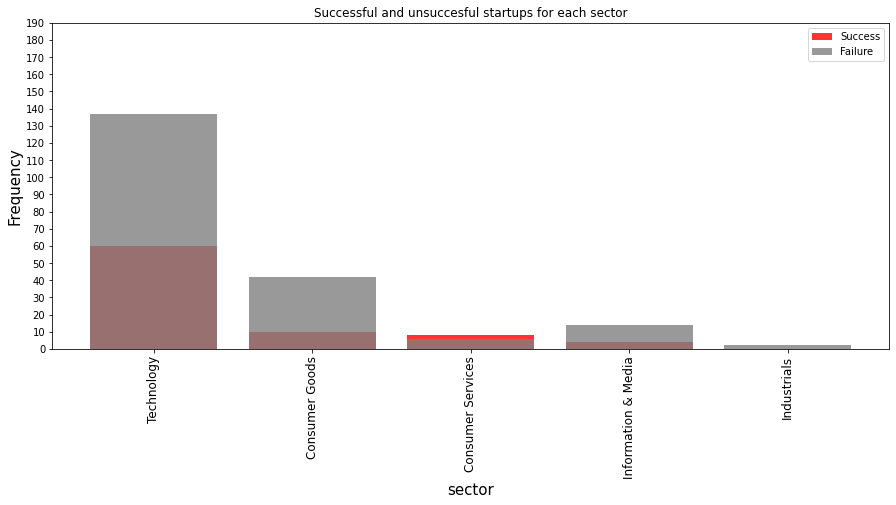

In [20]:
# call the function to plot the bar graphs for the 'sector' column
graphical_eda_graphs('sector')

**Insights: **

From the results above, majority of the startups are working in the technology sector. 

*   Out of these, 130 of them have been successful 
*   However, another 190 have been unsuccessful



**2. GRAPHICAL EXPLORATORY DATA ANALYSIS: CATEGORIES** 

This section plots the successful and unsuccessful companies in different categories 

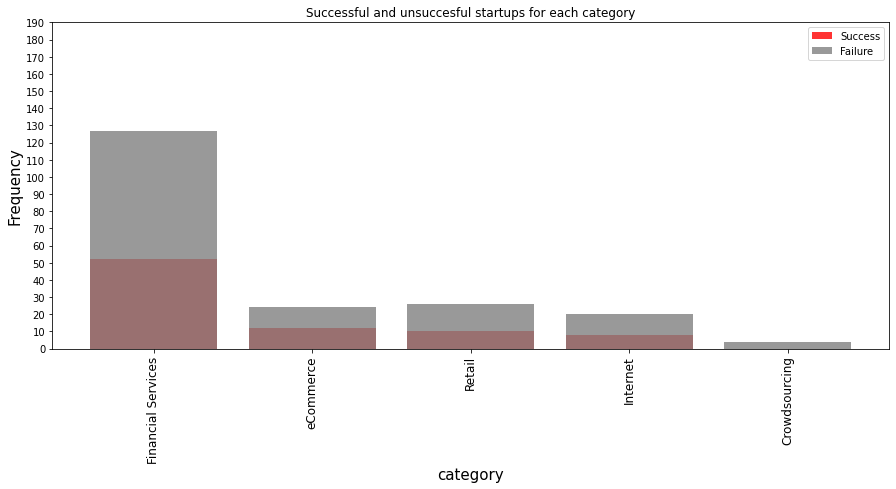

In [21]:
# call the function to plot the bar graphs for the 'category' column
graphical_eda_graphs('category')

**Insights: **

From the results above, majority of the startups are working in the financial services (fintech) category. 

*   Out of these, 70 of them have been successful 
*   And another 140 have been unsuccessful



**3. GRAPHICAL EXPLORATORY DATA ANALYSIS: COUNTRIES** 

This section plots the successful and unsuccessful companies in different countries

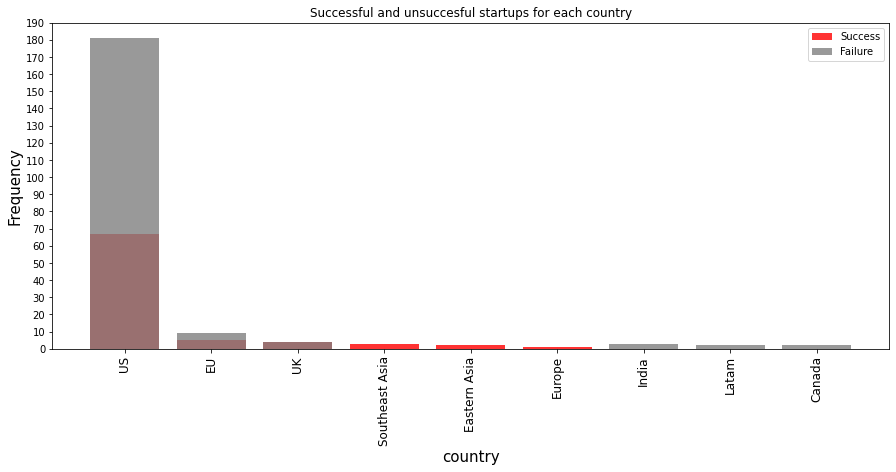

In [22]:
# call the function to plot the bar graphs for the 'country' column
graphical_eda_graphs('country')

**Insights: **

From the results above, majority of the startups are located in the US. 

*   Out of these, 190 of them have been successful 
*   Also, another 250 have been unsuccessful



**4. GRAPHICAL EXPLORATORY DATA ANALYSIS: OPERATING STATUS** 

This section plots the successful and unsuccessful companies for different operating status levels

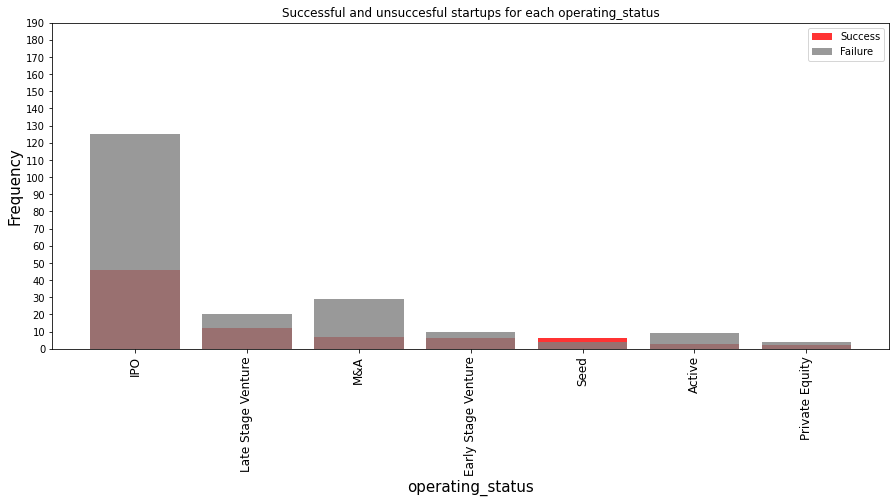

In [23]:
# call the function to plot the bar graphs for the 'operating status' column
graphical_eda_graphs('operating_status')

**Insights: **

From the results above, majority of the startups have launched an IPO. 

*   Out of these, 110 of them have been successful 
*   However, another 170 have been unsuccessful



**5. GRAPHICAL EXPLORATORY DATA ANALYSIS: IPO** 

This section plots the successful and unsuccessful companies for different IPO types 

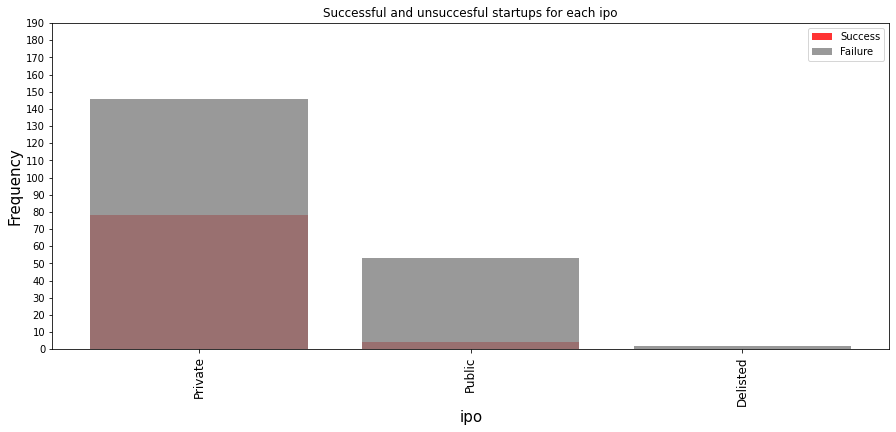

In [24]:
# call the function to plot the bar graphs for the 'ipo' column
graphical_eda_graphs('ipo')

**Insights: **

From the results above, majority of the startups actually launched a private IPO, as opposed to launching a public IPO.

*   Private IPO is the process of raising capital through private placements, such as pension funds, venture capitalists, and angel investors. In return for purchasing through private IPO, these entities get a certain percent of ownership in the company.
*   This process is in contrast to public IPO, where companies sell shares to the public to raise their capital. 

From the results above, it seems majority of the startups favor private IPOs to public ones. Out of all those who applied for private IPOs:

*   230 of them have been successful 
*   And also, 230 of them have been unsuccessful



**6. GRAPHICAL EXPLORATORY DATA ANALYSIS: HUB** 

This section plots the successful and unsuccessful companies for different hub types 

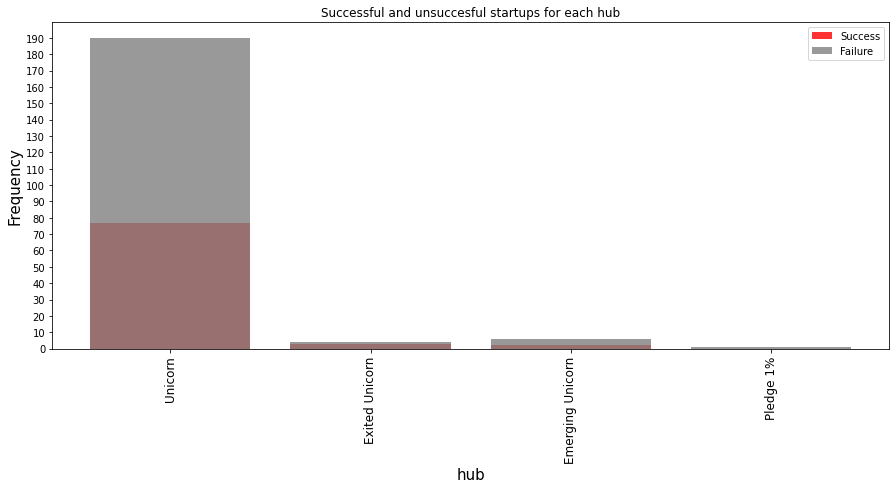

In [25]:
# call the function to plot the bar graphs for the 'hub' column
graphical_eda_graphs('hub')

**Insights: **

From the results above, majority of the startups are actually unicorns. The term unicorn refers to a privately held startup company with a value of over $1 billion. It is commonly used in the venture capital industry.   

From the results above, it is evident that majority of the startups are, indeed unicorns. Out of all these:

*   230 of these have been successful 
*   Also, more than 230 of them have been unsuccessful, as well



# THE TRAIN TEST SPLIT

Now that the dataset has been cleaned, preprocessed, and feature engineered, the next thing to do is to split the dataset into and train and test section

*   The train section - Used to fit the machine learning models onto the data so that it can learn the data patterns and relationships
*   The test section - Used to evaluate the performance of the machine learning models on the unseen observations



**1. PRINT NUMBER OF ROWS AND COLUMNS OF THE FINAL DATAFRAME**

In [79]:
# first, print the number of rows and columns available in the final dataframe
final_dataframe = hubs
print('The final dataframe has',final_dataframe.shape[0],'rows and',final_dataframe.shape[1],'columns')

The final dataframe has 283 rows and 38 columns


**2. CHECK THE METADATA INFO() OF THE FINAL DATAFRAME AFTER THE FEATURE ENGINEERING PROCESS**

In [80]:
# next, print the metadata info of the final dataframe after the feature engineering process
print(final_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 5 to 550
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               250 non-null    object 
 1   sector                             283 non-null    object 
 2   category                           283 non-null    object 
 3   country                            283 non-null    object 
 4   operating_status                   283 non-null    object 
 5   ipo                                283 non-null    object 
 6   patents                            283 non-null    object 
 7   trademarks                         283 non-null    object 
 8   hub                                283 non-null    object 
 9   latest_funding_type_column         283 non-null    object 
 10  second_latest_funding_type_column  283 non-null    object 
 11  latest_funding_year                283 non-null    int64  

**Insights:**

From the results above, the final dataframe has several columns that have the 'object' datatype. 

**3. DROP THE COLUMNS WITH THE 'OBJECT' DATA TYPES**

No machine learning model can work with object datatypes, thus we will drop these particular columns with the object datatypes and only remain with those columns that have either the 'uint8' datatype or the 'float64' datatype

In [81]:
# drop the columns with the 'object' datatype
final_dataframe_1 = final_dataframe
final_dataframe_1 = final_dataframe_1.drop(columns=['sector', 'category', 'country', 'operating_status', 'ipo', 'patents', 'trademarks', 'hub',
                                                     'latest_funding_type_column', 'second_latest_funding_type_column', 'latest_funding_year', 'second_latest_funding_year'])

# view first five rows of the new dataframe
final_dataframe_1.head()

,name,founded,success_labels,Canada,EU,Eastern Asia,Europe,India,Latam,Southeast Asia,...,M&A,Private Equity,Seed,Delisted,Private,Public,Emerging Unicorn,Exited Unicorn,Pledge 1%,Unicorn
5,Aeternity,2016.0,1.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
13,Intello Labs,2011.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
14,lithium cycles,2011.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
19,The DAO,2016.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
21,Aipoly,2011.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


**4. NEXT, SPLIT THE DATA INTO PREDICTOR AND RESPONSE VARIABLES**

*   Predictor variables - The features that we engineered in the previous section in order to predict the success of the startup companies, e.g. type of country, ipo, hub, ipo, etc. 
*   Response variables - The labels or target variables which we are trying to predict. For this case, the response variable is the 'success' variable in the dataset



In [82]:
# define the predictor variables/ features
x = final_dataframe_1.drop(['name','success_labels'], axis=1)

# define the response variable
y = final_dataframe_1['success_labels']

**5. NEXT, DEFINE THE KFOLD CROSS VALIDATION METHOD FOR THE TRAIN-TEST SPLIT**

In [83]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

**6. THEN, DEFINE A FUNCTION FOR COMPUTING THE CONFUSION MATRIX AND ACCURACY SCORE** 

In [84]:
def evaluate_model_performance(model, x, y, cv):
  # Use k-fold CV to evaluate the model's accuracy
  scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
  
  # Use k-fold CV to evaluate the model's confusion matrix
  y_pred = cross_val_predict(model, x, y, cv=cv)
  print('Confusion Matrix: ')
  print(confusion_matrix(y, y_pred))
  
  #view mean absolute error
  from numpy import mean, absolute, sqrt, std

  # report performance
  print('Accuracy Score: %.3f (%.3f)' % (mean(scores), std(scores)))

**7. ALSO, DEFINE A FUNCTION THAT PLOTS THE ROC_AUC CURVE FOR EACH MODEL**

In [85]:
def plot_roc_auc_curve(model, x, y, cv=cv):
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1

  # Compute the roc-auc curve
  #for train,test in cv.split(x,y):
  for train, test in cv.split(x):
    prediction = model.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

  # Plot the roc_auc curve
  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('The roc_auc curve')
  #plt.legend(loc="lower right")
  plt.text(0.32,0.7,'More accurate area',fontsize = 12)
  plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
  plt.show()

# MODELLING AND HYPERPARAMETER TUNING

This section builds and evaluates the performance of various classification models, such as:

*   Logistic Regression
*   Support Vector Machine
*   Kth Nearest Neighbour Classifier
*   Decision Tree Classifier
*   Random Tree Classifier




**1. CLASSIFICATION MODEL 1: LOGISTIC REGRESSION**


Confusion Matrix: 
[[191  10]
 [ 71  11]]
Accuracy Score: 0.714 (0.072)
None


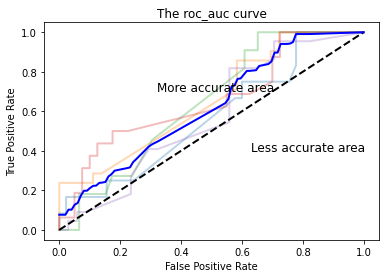

None


In [86]:
# import the LogisticRegression module from sklearn
from sklearn.linear_model import LogisticRegression

# create an instance of the LogisticRegression() object and tune the model's hyperparameters 
lr = LogisticRegression(penalty='l2', solver='liblinear', C=10.0)


# compute the cross-validation method
print(evaluate_model_performance(lr, x, y, cv))

# plot_roc_auc_curve
print(plot_roc_auc_curve(lr, x, y, cv))

**Please note:**

For the score metric, higher is better, i.e.:, a perfect model would have an accuracy score of 1.0

**2. CLASSIFICATION MODEL 2: SUPPORT VECTOR MACHINE**

Confusion Matrix: 
[[199   2]
 [ 43  39]]
Accuracy Score: 0.841 (0.044)
None


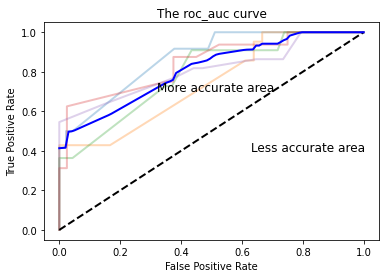

None


In [87]:
# import the support vector machine classification module
from sklearn.svm import SVC

# create an instance of the SVC() object and tune the model's hyperparameters
svc = SVC(kernel='linear', probability=True, C=10.0, random_state=21, gamma='auto', shrinking=False)

# compute the cross-validation method
print(evaluate_model_performance(svc, x, y, cv))

# plot_roc_auc_curve
print(plot_roc_auc_curve(svc, x, y, cv))

**Please note:**

For the score metric, higher is better, i.e.:, a perfect model would have an accuracy score of 1.0

**3. CLASSIFICATION MODEL 3: K-NEAREST-NEIGHBOURS (KNN) CLASSIFIER**

Confusion Matrix: 
[[201   0]
 [ 81   1]]
Accuracy Score: 0.713 (0.084)
None


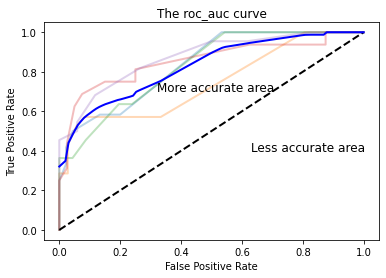

None


In [88]:
# import the KNN module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# define the number of neighbours
n_neighbors = 100 # <--- change this number to play around with how many nearest neighbours to look for.

# define the model and tune the model's hyperparameters by adjusting the number of neighbours
knn = KNeighborsClassifier(n_neighbors)

# compute the cross-validation method
print(evaluate_model_performance(knn, x, y, cv))

# plot_roc_auc_curve
print(plot_roc_auc_curve(knn, x, y, cv))

**Please note:**

For the score metric, higher is better, i.e.:, a perfect model would have an accuracy score of 1.0

**4. CLASSIFICATION MODEL 4: DECISION TREE CLASSIFIER**

Confusion Matrix: 
[[201   0]
 [ 41  41]]
Accuracy Score: 0.855 (0.042)
None


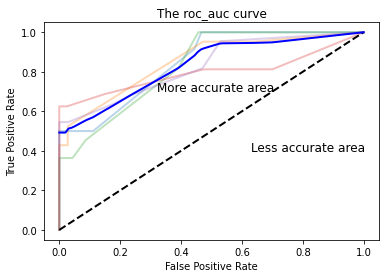

None


In [89]:
# import the DecisionTreeClassifier module from sklearn
from sklearn.tree import DecisionTreeClassifier

# define the model and tune the model's hyperparameters
tree = DecisionTreeClassifier(random_state=42, max_depth=20)

# compute the cross-validation method
print(evaluate_model_performance(tree, x, y, cv))

# plot_roc_auc_curve
print(plot_roc_auc_curve(tree, x, y, cv))

**Please note:**

For the score metric, higher is better, i.e.:, a perfect model would have an accuracy score of 1.0

**5. CLASSIFICATION MODEL 5: RANDOM FOREST CLASSIFIER**

Confusion Matrix: 
[[201   0]
 [ 41  41]]
Accuracy Score: 0.855 (0.042)
None


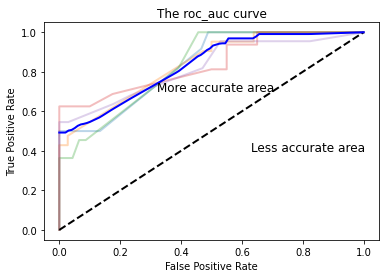

None


In [90]:
# import the RandomForestClassifier module from sklearn
from sklearn.ensemble import RandomForestClassifier

# define the model and tune the model's hyperparameters
forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# compute the cross-validation method
print(evaluate_model_performance(forest, x, y, cv))

# plot_roc_auc_curve
print(plot_roc_auc_curve(forest, x, y, cv))

**Please note:**

For the score metric, higher is better, i.e.:, a perfect model would have an accuracy score of 1.0

**9. ENSEMBLING THE THREE BEST CLASSIFIERS USING THE VOTINGCLASSIFIER() METHOD**

Confusion Matrix: 
[[201   0]
 [ 41  41]]
Accuracy Score: 0.855 (0.042)
None


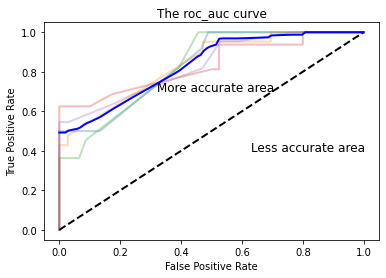

None


In [91]:
# First import the VotingClassifier module from sklearn
from sklearn.ensemble import VotingClassifier

# initializing all the model objects with default parameters
model_1 = SVC(kernel='linear', probability=True, C=10.0, random_state=21, gamma='auto', shrinking=False)
model_2 = DecisionTreeClassifier(random_state=42, max_depth=20)
model_3 = RandomForestClassifier()

# Making the final model using voting classifier
ensemble_model = VotingClassifier(
    estimators=[('svc', model_1), ('dt', model_2), ('rf', model_3)], voting='soft')

# compute the cross-validation method
print(evaluate_model_performance(ensemble_model, x, y, cv))

# plot_roc_auc_curve
print(plot_roc_auc_curve(ensemble_model, x, y, cv))

**Please note:**

For the score metric, higher is better, i.e.:, a perfect model would have an accuracy score of 1.0

# READ AND INTERPRET THE RESULTS OF THE PREDICTIONS FOR EACH COMPANY

After performing the classification using the five models above, this section now seeks to extract the results of each classification for each model and map it to each company in the testing dataset.

The goal is to use the prediction results to determine whether a given company is likely to be successful or unsuccessful, given the five predictor variables:


*   Is a given company likely to be successful or unsuccessful given the operating status?
*   Is a given company likely to be successful or unsuccessful given the country in which it is located?
*   Is a given company likely to be successful or unsuccessful given the sector and category in which it works in?

**1. EXTRACT THE PREDICTIONS USING THE MACHINE LEARNING MODEL THAT PERFORMED BEST**

The machine learning model that performed the best was the Random Forest Classifier model with an accuracy score of 0.86

In [92]:
# extract the prediction values from the Random Forest Classifier model (performed best)
y_pred = cross_val_predict(ensemble_model, x, y, cv=cv)
final_predictions = list(y_pred)

# append the final_predictions list into the final_dataframe in order to map each company name with its specific classification prediction
final_dataframe['classification_predictions'] = final_predictions
final_dataframe.head()

,name,sector,category,country,operating_status,ipo,patents,trademarks,hub,latest_funding_type_column,...,Private Equity,Seed,Delisted,Private,Public,Emerging Unicorn,Exited Unicorn,Pledge 1%,Unicorn,classification_predictions
5,Aeternity,Technology,Financial Services,Europe,IPO,Private,1,0,Unicorn,Initial Coin Offering,...,0,0,0,1,0,0,0,0,1,1.0
13,Intello Labs,Technology,Financial Services,US,Early Stage Venture,Private,0,0,Unicorn,Series A,...,0,0,0,1,0,0,0,0,1,0.0
14,lithium cycles,Technology,Financial Services,US,IPO,Private,7,0,Unicorn,Venture Round,...,0,0,0,1,0,0,0,0,1,0.0
19,The DAO,Technology,Financial Services,EU,IPO,Private,0,0,Unicorn,Initial Coin Offering,...,0,0,0,1,0,0,0,0,1,1.0
21,Aipoly,Technology,Financial Services,US,IPO,Private,1,0,Unicorn,Angel Round,...,0,0,0,1,0,0,0,0,1,0.0


**2. CALCULATE THE NUMBER OF COMPANIES THAT ARE CLASSIFIED AS SUCCESSFUL AND UNSUCCESSFUL AFTER THE CLASSIFICATION PREDICTIONS**

In [93]:
# print the number of companies that have been classified as successful and unsuccessful after the classification predictions
print(final_dataframe['classification_predictions'].value_counts().values[1],'companies were classified as successful, and',final_dataframe['classification_predictions'].value_counts().values[0],'were classified as unsuccessful after making the classification predictions')

41 companies were classified as successful, and 242 were classified as unsuccessful after making the classification predictions
